# Identify the Largest Recoverable Angular Scale of SCUBA2

Import packages

In [38]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from astropy import units as u
import aplpy
import AG_fft_tools as fft_tools
%matplotlib inline

Use Oph L1688 Herschel 250 um map as model image.
L1688 is located at ∼135 pc. Herschel 250 um map's resolution is 18" and pixel size is 6".

Plot model image, the source is about 3 deg * 3 deg

INFO: Auto-setting vmin to -9.325e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.035e+03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.325e+02 [aplpy.core]


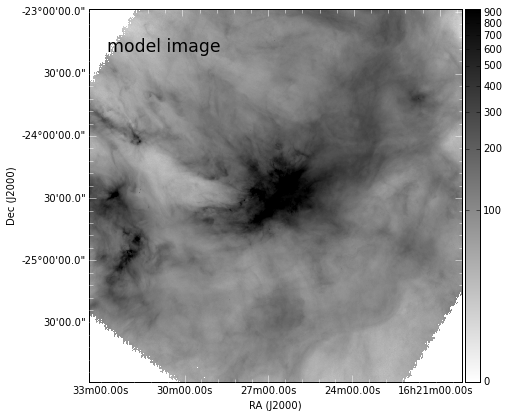

In [32]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/spire250.fits'
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/spire250.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_model.add_label(0.2,0.9, 'model image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(246.6879631142824,-24.48757996761378,width=3.,height=3.)

Scale the model map to a further distance, to mimic the observations at lower angular resolution.
I scale the model map to 1350 pc and have a resolution of 1.8" and pixel size of 0.6".
And also for using as the fakemap, I scale the flux of model image and move it to the same place of the blank image.

Plot scaled image, the source is about 0.3 deg * 0.3 deg

INFO: Auto-setting vmin to -2.238e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.484e-03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.238e-03 [aplpy.core]


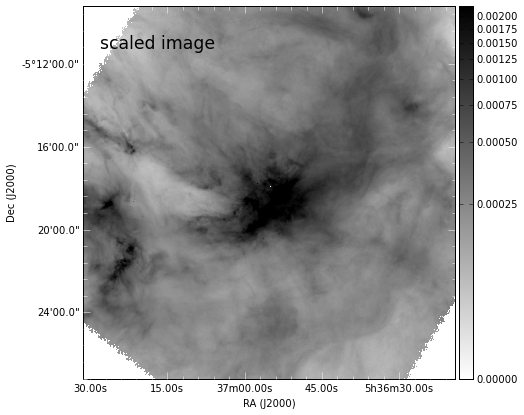

In [60]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/regrid/spire250.scale.conv.fits'
f_scaled = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/spire250.scale.conv.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_scaled.add_label(0.2,0.9, 'scaled image', color='black', relative=True, size='xx-large',layer='source')
f_scaled.show_grayscale()
f_scaled.add_colorbar()
f_scaled.colorbar.show()
f_scaled.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_scaled.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Plot the simulated SCUBA2 observation

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.612e-03 [aplpy.core]
INFO: Auto-setting vmax to  8.663e-03 [aplpy.core]
INFO: Auto-setting vmin to -7.631e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.728e-03 [aplpy.core]


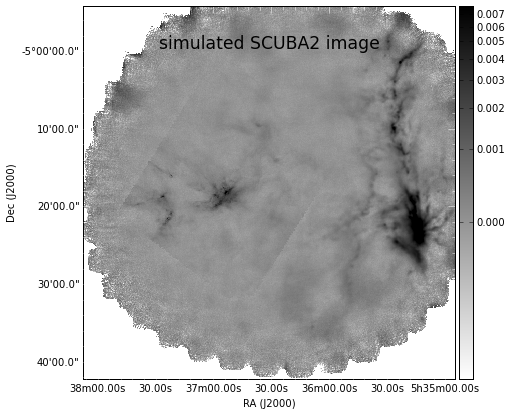

In [61]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.fits'
f_sim = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_sim.add_label(0.5,0.9, 'simulated SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_sim.show_grayscale()
f_sim.add_colorbar()
f_sim.colorbar.show()
f_sim.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_sim.recenter(84.1304166666667,-5.3035555555555,width=0.8,height=0.8)

Regrid the simulated SCUBA2 image to have the same pixel size of the scaled map for comparing it with our scaled model map.

Plot the re-grided simulated SCUBA2 observation

INFO: Auto-setting vmin to -4.484e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.188e-03 [aplpy.core]
INFO: Auto-setting vmin to -2.304e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.949e-03 [aplpy.core]


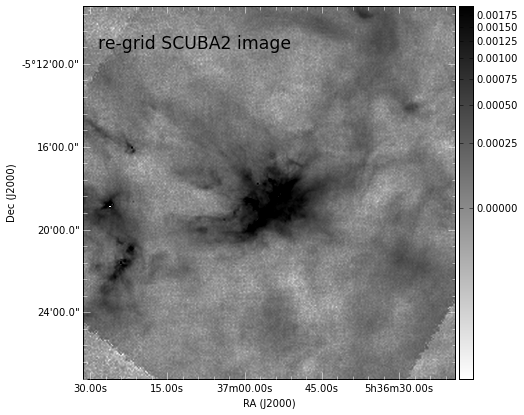

In [62]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.regrid.fits'
f_reg = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.regrid.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_reg.add_label(0.3,0.9, 're-grid SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_reg.show_grayscale()
f_reg.add_colorbar()
f_reg.colorbar.show()
f_reg.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_reg.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Compare the power spectrum of the scaled model and simulated SCUBA2 images to identify the largest recoverable angular scales of SCUBA2

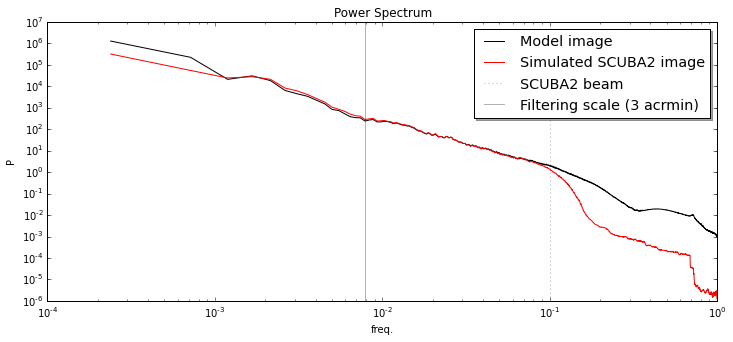

In [70]:
#import model map and simulated SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/regrid/spire250.scale.conv.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

SCUBA2_file='/Users/shjiao/desktop/Ophiuchus/regrid/new/blank850_fake.regrid.fits'
hdu_sc2=fits.open(SCUBA2_file)
data_sc2 = hdu_sc2[0].data

frequency_mod,zz1 = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_sc2,zz2 = fft_tools.PSD2(data_sc2,fft_pad=True,oned=True,view=False,wavnum_scale=False)


fig, ax = plt.subplots(figsize=(12,5))
ax.plot((frequency_mod),(zz1),linewidth=1.,color='black',label='Model image')
ax.plot((frequency_sc2),(zz2),linewidth=1.,color='red',label='Simulated SCUBA2 image')

#add beam/filtering info
beam_sc2_freq = 0.6/(14.0/2.35)
ax.axvline(x=beam_sc2_freq,linestyle=':',color='k',alpha=0.3,label='SCUBA2 beam')
filter_scale = 0.6/(3.*60./2.35)
ax.axvline(filter_scale,linestyle='-',color='k',alpha=0.3,label='Filtering scale (3 acrmin)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('freq.')
ax.set_ylabel('P')
ax.set_title('Power Spectrum')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()